In [1]:
# This program is based on the Udemy course "Python for Finance: Investment Fundamentals & Data Analytics" 
# by Martin and Ned from 365
# Link to the course: https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/
# This is a jupyter notebook file, better to run in jupyter notebook enviorment.
# Author: Martin and Ned, 365 Team. 
# Updated by: Kuo L. 2022-02-01
# Use this script to compare expected performance with actual performance with 3 year increments.

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# It uses yahoo finance api to get close price for each ticker stock/ETF.
# use any 3 tickers, I just use vanguard ETFs.
# you can put more than 3 tickers, just note that the more tickers in, 
# the more calculation needed to plot efficient frontier. change num_simulation to a higher number as needed.

num_simulation = 3000
assets = ['AAPL','CMCSA','COST','VTI','VUG','VYM']
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2019-1-1', end = '2022-1-1')['Adj Close'] 

In [3]:
pf_data.head() #makre sure companies were public at starting date

,AAPL,CMCSA,COST,VTI,VUG,VYM
Date,,,,,,
2019-01-02,38.277531,32.375896,194.150742,121.519745,131.077316,70.912544
2019-01-03,34.464806,32.630230,190.035660,118.703659,127.065628,69.623550
2019-01-04,35.936077,33.732342,195.554077,122.632858,132.121704,71.647820
2019-01-07,35.856091,33.374397,196.274704,123.869652,133.468704,71.992760
2019-01-08,36.539619,33.647572,197.744415,125.144501,135.098724,72.582787


In [4]:
pf_data.tail() #check companies still open and public at ending date

,AAPL,CMCSA,COST,VTI,VUG,VYM
Date,,,,,,
2021-12-27,180.100540,50.221329,562.617249,242.960007,325.089996,111.690002
2021-12-28,179.061859,50.261131,563.785522,242.460007,323.640015,111.940002
2021-12-29,179.151749,50.340736,566.910767,242.600006,323.760010,112.160004
2021-12-30,177.973251,50.340736,563.056580,242.210007,322.480011,111.970001
2021-12-31,177.344055,50.082020,566.840881,241.440002,320.899994,112.110001


<AxesSubplot:xlabel='Date'>

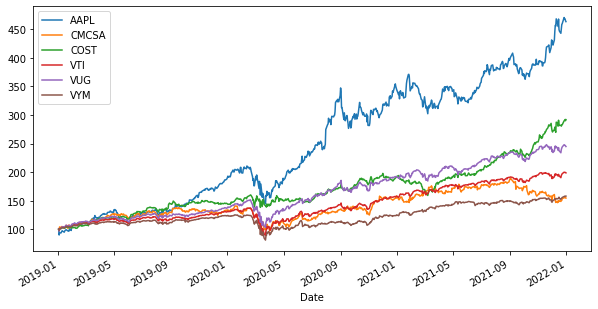

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [7]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

AAPL     0.507020
CMCSA    0.144262
COST     0.354313
VTI      0.227032
VUG      0.296079
VYM      0.151466
dtype: float64

In [8]:
log_returns.cov() * 250 #get coveriance between each pair.

,AAPL,CMCSA,COST,VTI,VUG,VYM
AAPL,0.115805,0.046222,0.042815,0.059248,0.069865,0.046548
CMCSA,0.046222,0.079930,0.028536,0.044397,0.042955,0.044626
COST,0.042815,0.028536,0.047826,0.030274,0.034834,0.026787
VTI,0.059248,0.044397,0.030274,0.050907,0.051989,0.046477
VUG,0.069865,0.042955,0.034834,0.051989,0.058434,0.042771
VYM,0.046548,0.044626,0.026787,0.046477,0.042771,0.048473


In [9]:
log_returns.corr() #get correlation between each pair.

,AAPL,CMCSA,COST,VTI,VUG,VYM
AAPL,1.000000,0.480427,0.575303,0.771648,0.849302,0.621285
CMCSA,0.480427,1.000000,0.461530,0.696001,0.628535,0.716946
COST,0.575303,0.461530,1.000000,0.613551,0.658920,0.556346
VTI,0.771648,0.696001,0.613551,1.000000,0.953201,0.935612
VUG,0.849302,0.628535,0.658920,0.953201,1.000000,0.803656
VYM,0.621285,0.716946,0.556346,0.935612,0.803656,1.000000


***

In [10]:
num_assets = len(assets)
pfolio_returns = []
pfolio_volatilities = []

w_lst = []

for i in range(num_assets):
    w_lst.append([])

# Followig generate the simulation
for x in range (num_simulation):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    for i in range(num_assets):
        w_lst[i].append(weights[i])

    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

for i in range(num_assets):
    w_lst[i] = np.array(w_lst[i])

# pfolio_returns, pfolio_volatilities, w_lst[0], w_lst[1], w_lst[2]

In [11]:
# build simulated portfolios.
df_build = {'Return': pfolio_returns, 'Volatility': pfolio_volatilities}
for w in range(num_assets):
    df_build[assets[w]] = w_lst[w]
portfolios = pd.DataFrame(df_build)

In [12]:
portfolios.head() #checking to see if any error

,Return,Volatility,AAPL,CMCSA,COST,VTI,VUG,VYM
0,0.267691,0.231131,0.214665,0.265040,0.036927,0.207212,0.129037,0.147118
1,0.304506,0.229025,0.230279,0.191461,0.136097,0.155900,0.229270,0.056993
2,0.273293,0.216868,0.104432,0.249643,0.195240,0.120276,0.261396,0.069014
3,0.270819,0.215602,0.137300,0.157483,0.167395,0.112360,0.202081,0.223381
4,0.300847,0.222414,0.231005,0.129604,0.179468,0.078813,0.178543,0.202567


In [13]:
portfolios.tail() #checking to see if any error

,Return,Volatility,AAPL,CMCSA,COST,VTI,VUG,VYM
2995,0.268225,0.199412,0.017360,0.038181,0.376213,0.209198,0.129583,0.229465
2996,0.323821,0.214274,0.220866,0.093775,0.380016,0.222504,0.004160,0.078679
2997,0.279986,0.216674,0.180569,0.218567,0.211953,0.166247,0.071473,0.151191
2998,0.274135,0.237092,0.211358,0.348242,0.027934,0.173926,0.215880,0.022659
2999,0.277513,0.206535,0.073625,0.022124,0.285066,0.200243,0.187205,0.231737


In [14]:
portfolios.sort_values(by=['Volatility']) # Sort by volatility. Theoretically the portfolio with lowest valatility is the best one.

,Return,Volatility,AAPL,CMCSA,COST,VTI,VUG,VYM
73,0.250052,0.194764,0.003400,0.043861,0.431657,0.101721,0.016914,0.402446
2249,0.271822,0.195646,0.007428,0.115499,0.561061,0.027612,0.018327,0.270073
1538,0.274370,0.197934,0.049886,0.046035,0.441362,0.154426,0.029732,0.278559
2615,0.257213,0.198423,0.015525,0.219887,0.470267,0.065507,0.010156,0.218657
135,0.277928,0.198956,0.023245,0.107653,0.446015,0.044286,0.173935,0.204866
...,...,...,...,...,...,...,...,...
798,0.378313,0.262740,0.494833,0.053811,0.066850,0.048584,0.235548,0.100374
2887,0.361568,0.263129,0.478295,0.008169,0.001272,0.143236,0.200670,0.168358
2144,0.373610,0.263137,0.498923,0.099316,0.052742,0.125145,0.175020,0.048854
1035,0.379881,0.265224,0.561923,0.006497,0.063678,0.093675,0.059970,0.214256


Text(0, 0.5, 'Expected Return')

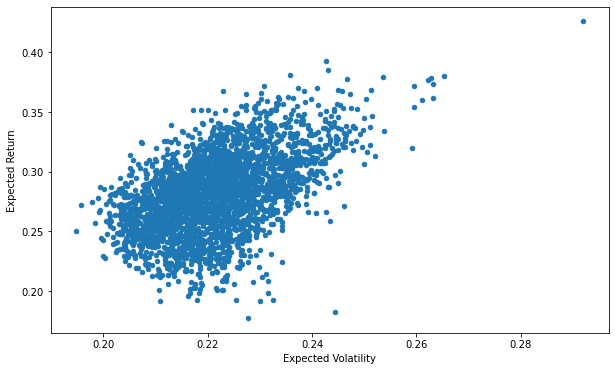

In [15]:
# check the plot
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [16]:
# #generate path and name then export
# path = 'results/'
# name = '_'.join(assets) + '.csv'
# path_name = path + name 
# portfolios.sort_values(by=['Volatility']).to_csv(path_name)

In [17]:
# calculation
print("money amount calculation for demo use only, please don't simply invest on this results alone.")

sorted_portfolios = portfolios.sort_values(by=['Volatility']).head(1)

total_investment = 25000
print("Intend to invest ${:.2f}".format(total_investment) + " total.")

for i in range(num_assets):
    inv = total_investment * sorted_portfolios[assets[i]].iloc[0]
    print("\tinvest in " + assets[i] + " for ${:.2f}".format(inv) + ".")

print("Expected annual portfolio return is {:.1f}".format(sorted_portfolios['Return'].iloc[0]*100) + "%")
print("Expected annual portfolio volatility is {:.1f}".format(sorted_portfolios['Volatility'].iloc[0]*100) + "%")

money amount calculation for demo use only, please don't simply invest on this results alone.
Intend to invest $25000.00 total.
	invest in AAPL for $85.00.
	invest in CMCSA for $1096.53.
	invest in COST for $10791.43.
	invest in VTI for $2543.03.
	invest in VUG for $422.86.
	invest in VYM for $10061.16.
Expected annual portfolio return is 25.0%
Expected annual portfolio volatility is 19.5%


# above is the expected return using 3-year data
# below is the actual return using 1 year data.

In [18]:
pf_data_actual = pd.DataFrame()
invested_weights = []

for i in range(num_assets):
    invested_weights.append(sorted_portfolios[assets[i]].iloc[0])
invested_weights = np.array(invested_weights)

for a in assets:
    pf_data_actual[a] = wb.DataReader(a, data_source = 'yahoo', start = '2021-1-1', end = '2022-1-1')['Adj Close'] 

log_returns_actual = np.log(pf_data_actual / pf_data_actual.shift(1))   #compute actual daily log return for all stocks

#get actual portfolio return
print("Actual annual portfolio return is {:.1f}".format(np.sum(invested_weights * log_returns_actual.mean()) * 250 *100) + "%")
#get actual portfolio volatility
print("Actual annual portfolio volatility is {:.1f}".format(np.sqrt(np.dot(invested_weights.T,np.dot(log_returns_actual.cov() * 250, invested_weights)))*100) +"%")


Actual annual portfolio return is 30.4%
Actual annual portfolio volatility is 12.6%
